In [3]:
#Importing the necessary  libraries
import os
import shutil
import fiona
import folium
import geopandas as gpd
import matplotlib.pyplot as plt
import xarray
import pandas
from pathlib import Path
import dataretrieval.nwis as nwis
import numpy as np

from utils import *

In [ ]:
# first we need to install the ngiab data preprocess using: pip install ngiab_data_preprocess --user
#Then get the subset of hydrofabric, provide the catchment or USGS ID

# catchment_id = '2431121'

# catchment_id = '2436877'
# catchment_id  = '2408020'
# gage_id = '02464000'

# cat_ids = sorted(cat_ids)

In [ ]:
cat_ids =[
 '100224', '1010263', '1021677', '1023764', '102612', '103066', '105032', '105049', '105101',
 '105663', '105836', '1077437', '1077455', '1077921', '1078797', '1078883', '1078884', '1078889',
 '1078901', '1078916', '1079044', '1079156', '1079314', '1079621', '1080803', '1081184', '1081895',
 '1088778', '1090024', '1091210', '1092307', '1092590', '1093260', '1093967', '1094076', '1094439',
 '1097193', '109748', '1098522', '1098532', '1100007', '1100010', '1100111', '1100508', '1100659',
 '1100668', '1100834', '1103277', '1106175', '1106551', '1111774', '1111984', '1121208', '1121664',
 '1122758', '1123000', '1123314', '1123351', '1123606', '1123628', '1125753', '114960', '115994',
 '116003', '116210', '116485', '116510', '116555', '116556', '116705', '117089', '119180', '121130',
 '1315131', '1324300', '1324836', '1328476', '1334564', '1338147', '1338908', '1339142', '1339618',
 '1539825', '1540398', '1550076', '1555666', '1559541', '1561642', '1562395', '1564208', '1570551',
 '1580153', '1582822', '1585863', '1590404', '17457', '17490', '1873568', '2148498', '2149779',
 '2149905', '2163782', '2171432', '2172259', '2179964', '2179983', '2179985', '2179991', '2180666',
 '2180770', '2185390', '2186888', '2188294', '2189046', '2189444', '2189733', '2190019', '2198828',
 '2199507', '2407979', '2407990', '2408311', '2411262', '2412684', '2415300', '2419044', '2419963',
 '2434636', '2438150', '2439150', '2439459', '2441034', '2441171', '2441965', '247118', '247359',
 '247372', '247955', '249028', '251946', '2526982', '256379', '257900', '258209', '258217', '259429',
 '262861', '263739', '265724', '267179', '270662', '270916', '271006', '271398', '2716276', '2720627',
 '2748412', '2751904', '2877827', '3052009', '3056235', '420580', '420586', '420618', '482252',
 '482303', '487858', '491530', '491544', '491560', '491602', '502014', '505420', '505611', '506174',
 '506332', '506560', '655183', '658797', '659075', '661279', '787253', '788423', '788433', '789787',
 '789788', '791355', '791519', '792075', '792341', '794072', '794236', '795702', '796025', '798139',
 '804994', '805079', '805158', '805223', '805795', '805799', '805806', '807627', '807656', '807661',
 '809769', '811597', '811610', '811620', '811621', '813331', '813388', '813434', '813886', '813937',
 '814543', '814754', '814794', '817013', '821251', '822473', '823812', '825925', '826305', '826367',
 '826868', '827255', '827260', '829282', '830761', '831306', '831331', '832646', '832650', '832651',
 '832677', '836391', '836437', '837083', '91390', '91769', '91771', '92138', '93002', '93071',
 '94417', '94429', '94440', '94536', '94772', '95082', '95097', '95120', '96522', '99536', "105049", "2877827", "271006", "116705", "117089", "805158", "811597", "811610", "811621", "805795", "105836", "105101", "105663", "105836", 
"1010263", "116003", "794236", "791355", "1559541", "251946", "832646", "791355", "792075", "805079", "2716276", "2720627", "1338908", "655183",
"119180", "105049", "2526982", "826868", "1079044", "2189444", "2190019", "826367", "805079", "805079","1324836", "1324836", "2163782", "2189046",
"2439459", "491530", "491560", "491602", "831306", "836391", "482252", "1021677", "814543", "1125753", "3056235"
]

In [5]:
#Pass either gage or catchmen: here I am passing the Gage

# run_ngiab_subset(gage_id=gage_id)

# run_ngiab_subset(catchment_id = catchment_id)

**Subsetting the desired catchments**

In [6]:
from data_processing.file_paths import file_paths
from data_processing.subset import create_subset_gpkg
from pathlib import Path
from typing import List
def subset(
    cat_ids: str | List[str],
    hydrofabric: Path = file_paths.conus_hydrofabric,
    include_outlet: bool = True,
):
    if isinstance(cat_ids, str):
        cat_ids = [cat_ids]
    cat_ids = [f"cat-{id.split('-')[-1]}" for id in cat_ids]
    cat_ids = sorted(cat_ids)
    output_folder_name = f"{cat_ids[0]}"
    paths = file_paths(output_folder_name)
    output_gpkg_path = paths.geopackage_path

    wb_ids = [f"wb-{id.split('-')[-1]}" for id in cat_ids]
    create_subset_gpkg(wb_ids, hydrofabric, output_gpkg_path)

In [7]:
# subset(cat_ids)

# #Run in loop
# for id in cat_ids:
#     subset(id)

import os

output_dir = "../ngiab_preprocess_output"

for id in cat_ids:
    folder_path = os.path.join(output_dir, f"cat-{id}")
    if os.path.exists(folder_path):
        continue
    print(f"Processing cat-{id}")
    subset(id)


Processing cat-2179964
Processing cat-257900


In [12]:
# define the path to hydrofabric geopackage file

# hf_filepath = Path("../outputs/Austin_HF.gpkg")

#OR if the bydrafabric is form catchmentID or gage Location

#For gage ID
# hf_filepath = f"../ngiab_preprocess_output/gage-{gage_id}/config/gage-{gage_id}_subset.gpkg"

#For catchment ID
# hf_filepath = f"../ngiab_preprocess_output/cat-{catchment_id}/config/cat-{catchment_id}_subset.gpkg"

In [13]:
#For the specific catchments
cat_ids = sorted(cat_ids)
hf_filepath = f"../ngiab_preprocess_output/cat-{cat_ids[0]}/config/cat-{cat_ids[0]}_subset.gpkg"


In [14]:
layers = fiona.listlayers(hf_filepath)
print( 45*'-' + '\nThe Geopackage contains the following layers: \n' + 45*'-')
for layer in layers:
    print(layer)

---------------------------------------------
The Geopackage contains the following layers: 
---------------------------------------------
flowpaths
divides
lakes
hydrolocations
nexus
pois
flowpath-attributes
flowpath-attributes-ml
network
divide-attributes


In [15]:
# load the layers
divides = gpd.read_file(hf_filepath, layer="divides")
flowpaths = gpd.read_file(hf_filepath, layer="flowpaths")
nexus = gpd.read_file(hf_filepath, layer="nexus")

print(f'{len(divides)} Divides')
print(f'{len(flowpaths)} Flowpaths')
print(f'{len(nexus)} Nexus')

251 Divides
251 Flowpaths
246 Nexus


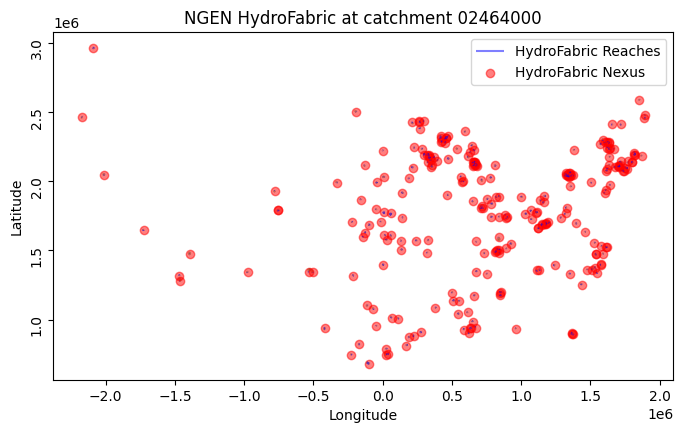

In [16]:
#plot the ngen hydrfabric; pass the hydrofabric path
plot_ngen_hydrofabric(hf_filepath, catchment_id='02464000')

In [31]:
#Call the function to plot the ngen-hydro fabric interactive
m = plot_hydrofabric(hf_filepath)
m 

In [7]:
#Get forcings data
start_date = "2005-01-01"
end_date = "2020-12-30"

In [7]:
#Get forcing
def get_ngiab_forcings(gage_id=None, catchment_id=None, cat_ids = None, start=None, end=None):
    """
    Run ngiab_data_cli for either gage or catchment with optional date range and full flag.

    Parameters:
        gage_id (str): USGS gage site number (e.g., '02464000')
        catchment_id (str): Catchment ID (e.g., '2430598')
        start (str): Start date in YYYY-MM-DD format
        end (str): End date in YYYY-MM-DD format
        full (bool): If True, include the -f (full) flag
        cat_ids : Is for multiple catchments (only particular one)
    """
    if sum([gage_id is not None, catchment_id is not None, bool(cat_ids)]) > 1:
        raise ValueError("Provide only one of: gage_id, catchment_id, or cat_ids.")
    if not any([gage_id is not None, catchment_id is not None, bool(cat_ids)]):
        raise ValueError("You must specify exactly one of: gage_id, catchment_id, or cat_ids.")

    # Base ID
    id_str = f"gage-{gage_id}" if gage_id else (f"cat-{catchment_id}" if catchment_id else f"cat-{cat_ids}")

    # Start building command
    cmd = ["python", "-m", "ngiab_data_cli", "-i", id_str]

    cmd.append("-f")
    # Add date range if provided ≤≥
    if start:
        cmd += ["--start", start]
    if end:
        cmd += ["--end", end]

    print("Running command:", " ".join(cmd))
    subprocess.run(cmd, check=True)


In [8]:
# get_ngiab_forcings(gage_id = gage_id, start = "2017-01-01", end= "2017-12-30")
# get_ngiab_forcings(cat_ids = cat_ids, start = start_date, end = end_date )

#In loop
for id in cat_ids:
    print(id)
    get_ngiab_forcings(cat_ids = id, start = start_date, end = end_date )

94429
Running command: python -m ngiab_data_cli -i cat-94429 -f --start 2005-01-01 --end 2020-12-30
⠧ Initializing.....


2025-07-07 12:15:27,412 - INFO - Processing cat-94429 in /home/jovyan/ngiab_preprocess_output/cat-94429
2025-07-07 12:15:28,926 - INFO - Upstream catchments: 1
2025-07-07 12:15:28,927 - INFO - Generating forcings from 2005-01-01 00:00:00 to 2020-12-30 00:00:00...
/home/jovyan/.local/lib/python3.11/site-packages/distributed/dashboard/core.py:20: UserWarning: 
Dask needs bokeh >= 2.4.2, < 3 for the dashboard.
You have bokeh==3.4.0.
Continuing without the dashboard.
  warnings.warn(
2025-07-07 12:15:29,581 - INFO - State start
2025-07-07 12:15:29,584 - INFO -   Scheduler at:     tcp://127.0.0.1:39975
2025-07-07 12:15:29,584 - INFO -   dashboard at:  /user/supathdhitalgeo/proxy/8787/status
2025-07-07 12:15:29,598 - INFO -         Start Nanny at: 'tcp://127.0.0.1:41385'
2025-07-07 12:15:29,600 - INFO -         Start Nanny at: 'tcp://127.0.0.1:43607'
2025-07-07 12:15:29,602 - INFO -         Start Nanny at: 'tcp://127.0.0.1:38103'
2025-07-07 12:15:29,605 - INFO -         Start Nanny at: 'tcp:

Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…36m-:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surf

2025-07-07 12:16:22,201 - INFO - Forcing generation complete! Zonal stats computed in 8.083012 seconds
2025-07-07 12:16:22,470 - INFO - Saving to disk
2025-07-07 12:16:22,659 - INFO - Receive client connection: Client-worker-3225fbc2-5b2c-11f0-9259-4a5bda9ac9b9
2025-07-07 12:16:22,660 - INFO - Starting established connection to tcp://127.0.0.1:44032
2025-07-07 12:16:22,661 - INFO - Receive client connection: Client-worker-32269330-5b2c-11f0-9254-4a5bda9ac9b9
2025-07-07 12:16:22,662 - INFO - Starting established connection to tcp://127.0.0.1:44034
2025-07-07 12:16:22,662 - INFO - Receive client connection: Client-worker-3226b31d-5b2c-11f0-9256-4a5bda9ac9b9
2025-07-07 12:16:22,663 - INFO - Starting established connection to tcp://127.0.0.1:44050
2025-07-07 12:16:22,664 - INFO - Receive client connection: Client-worker-32262063-5b2c-11f0-925d-4a5bda9ac9b9
2025-07-07 12:16:22,664 - INFO - Starting established connection to tcp://127.0.0.1:44062
2025-07-07 12:16:23,016 - INFO - Forcings gen

94440
Running command: python -m ngiab_data_cli -i cat-94440 -f --start 2005-01-01 --end 2020-12-30
⠏ Initializing.....


2025-07-07 12:16:30,138 - INFO - Processing cat-94440 in /home/jovyan/ngiab_preprocess_output/cat-94440
2025-07-07 12:16:31,597 - INFO - Upstream catchments: 28
2025-07-07 12:16:31,597 - INFO - Generating forcings from 2005-01-01 00:00:00 to 2020-12-30 00:00:00...
/home/jovyan/.local/lib/python3.11/site-packages/distributed/dashboard/core.py:20: UserWarning: 
Dask needs bokeh >= 2.4.2, < 3 for the dashboard.
You have bokeh==3.4.0.
Continuing without the dashboard.
  warnings.warn(
2025-07-07 12:16:32,276 - INFO - State start
2025-07-07 12:16:32,278 - INFO -   Scheduler at:     tcp://127.0.0.1:41219
2025-07-07 12:16:32,279 - INFO -   dashboard at:  /user/supathdhitalgeo/proxy/8787/status
2025-07-07 12:16:32,293 - INFO -         Start Nanny at: 'tcp://127.0.0.1:38183'
2025-07-07 12:16:32,295 - INFO -         Start Nanny at: 'tcp://127.0.0.1:40629'
2025-07-07 12:16:32,297 - INFO -         Start Nanny at: 'tcp://127.0.0.1:40377'
2025-07-07 12:16:32,299 - INFO -         Start Nanny at: 'tcp

Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…36m-:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surf

2025-07-07 12:17:24,124 - INFO - Forcing generation complete! Zonal stats computed in 8.243982 seconds
2025-07-07 12:17:24,391 - INFO - Saving to disk
2025-07-07 12:17:24,575 - INFO - Receive client connection: Client-worker-570e2fe1-5b2c-11f0-931b-4a5bda9ac9b9
2025-07-07 12:17:24,576 - INFO - Starting established connection to tcp://127.0.0.1:37724
2025-07-07 12:17:24,577 - INFO - Receive client connection: Client-worker-570e4c57-5b2c-11f0-931f-4a5bda9ac9b9
2025-07-07 12:17:24,577 - INFO - Starting established connection to tcp://127.0.0.1:37736
2025-07-07 12:17:24,580 - INFO - Receive client connection: Client-worker-570ed1e8-5b2c-11f0-9321-4a5bda9ac9b9
2025-07-07 12:17:24,580 - INFO - Starting established connection to tcp://127.0.0.1:37748
2025-07-07 12:17:24,591 - INFO - Receive client connection: Client-worker-570f0e71-5b2c-11f0-9324-4a5bda9ac9b9
2025-07-07 12:17:24,591 - INFO - Starting established connection to tcp://127.0.0.1:37750
2025-07-07 12:17:24,933 - INFO - Forcings gen

94536
Running command: python -m ngiab_data_cli -i cat-94536 -f --start 2005-01-01 --end 2020-12-30
⠏ Initializing.....


2025-07-07 12:17:32,024 - INFO - Processing cat-94536 in /home/jovyan/ngiab_preprocess_output/cat-94536
2025-07-07 12:17:33,454 - INFO - Upstream catchments: 80
2025-07-07 12:17:33,455 - INFO - Generating forcings from 2005-01-01 00:00:00 to 2020-12-30 00:00:00...
/home/jovyan/.local/lib/python3.11/site-packages/distributed/dashboard/core.py:20: UserWarning: 
Dask needs bokeh >= 2.4.2, < 3 for the dashboard.
You have bokeh==3.4.0.
Continuing without the dashboard.
  warnings.warn(
2025-07-07 12:17:34,096 - INFO - State start
2025-07-07 12:17:34,099 - INFO -   Scheduler at:     tcp://127.0.0.1:36353
2025-07-07 12:17:34,099 - INFO -   dashboard at:  /user/supathdhitalgeo/proxy/8787/status
2025-07-07 12:17:34,113 - INFO -         Start Nanny at: 'tcp://127.0.0.1:39535'
2025-07-07 12:17:34,115 - INFO -         Start Nanny at: 'tcp://127.0.0.1:42623'
2025-07-07 12:17:34,117 - INFO -         Start Nanny at: 'tcp://127.0.0.1:36139'
2025-07-07 12:17:34,119 - INFO -         Start Nanny at: 'tcp

[                                        ] | 0% Completed |  5.9s

2025-07-07 12:18:24,012 - INFO - Receive client connection: Client-worker-7a7a2cb7-5b2c-11f0-93dd-4a5bda9ac9b9
2025-07-07 12:18:24,014 - INFO - Starting established connection to tcp://127.0.0.1:49474


[                                        ] | 0% Completed |  6.2s

2025-07-07 12:18:24,370 - INFO - Receive client connection: Client-worker-7ab1e94c-5b2c-11f0-93e0-4a5bda9ac9b9
2025-07-07 12:18:24,371 - INFO - Starting established connection to tcp://127.0.0.1:49478


[                                        ] | 1% Completed |  7.6s

2025-07-07 12:18:25,827 - INFO - Receive client connection: Client-worker-7b8ebfc5-5b2c-11f0-93e3-4a5bda9ac9b9
2025-07-07 12:18:25,828 - INFO - Starting established connection to tcp://127.0.0.1:49488


[                                        ] | 1% Completed |  8.3s

2025-07-07 12:18:26,382 - INFO - Receive client connection: Client-worker-7be3b1b1-5b2c-11f0-93da-4a5bda9ac9b9
2025-07-07 12:18:26,382 - INFO - Starting established connection to tcp://127.0.0.1:49500


[########################################] | 100% Completed |  6min 15.6s

2025-07-07 12:24:34,313 - INFO - Computing zonal stats in parallel for all timesteps


Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…36m-:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surf

2025-07-07 12:24:41,796 - INFO - Forcing generation complete! Zonal stats computed in 7.482789 seconds
2025-07-07 12:24:42,063 - INFO - Saving to disk
2025-07-07 12:24:42,534 - INFO - Forcings generation complete.
2025-07-07 12:24:42,636 - INFO - Closing Nanny at 'tcp://127.0.0.1:39535'. Reason: nanny-close
2025-07-07 12:24:42,636 - INFO - Nanny asking worker to close. Reason: nanny-close
2025-07-07 12:24:42,637 - INFO - Closing Nanny at 'tcp://127.0.0.1:42623'. Reason: nanny-close
2025-07-07 12:24:42,638 - INFO - Nanny asking worker to close. Reason: nanny-close
2025-07-07 12:24:42,638 - INFO - Closing Nanny at 'tcp://127.0.0.1:36139'. Reason: nanny-close
2025-07-07 12:24:42,638 - INFO - Nanny asking worker to close. Reason: nanny-close
2025-07-07 12:24:42,638 - INFO - Closing Nanny at 'tcp://127.0.0.1:44117'. Reason: nanny-close
2025-07-07 12:24:42,639 - INFO - Nanny asking worker to close. Reason: nanny-close
2025-07-07 12:24:42,640 - INFO - Remove client Client-worker-7be3b1b1-5b2c

94772
Running command: python -m ngiab_data_cli -i cat-94772 -f --start 2005-01-01 --end 2020-12-30
⠙ Initializing.....


2025-07-07 12:24:50,188 - INFO - Processing cat-94772 in /home/jovyan/ngiab_preprocess_output/cat-94772
2025-07-07 12:24:51,601 - INFO - Upstream catchments: 1
2025-07-07 12:24:51,601 - INFO - Generating forcings from 2005-01-01 00:00:00 to 2020-12-30 00:00:00...
/home/jovyan/.local/lib/python3.11/site-packages/distributed/dashboard/core.py:20: UserWarning: 
Dask needs bokeh >= 2.4.2, < 3 for the dashboard.
You have bokeh==3.4.0.
Continuing without the dashboard.
  warnings.warn(
2025-07-07 12:24:52,252 - INFO - State start
2025-07-07 12:24:52,255 - INFO -   Scheduler at:     tcp://127.0.0.1:46663
2025-07-07 12:24:52,255 - INFO -   dashboard at:  /user/supathdhitalgeo/proxy/8787/status
2025-07-07 12:24:52,270 - INFO -         Start Nanny at: 'tcp://127.0.0.1:45189'
2025-07-07 12:24:52,273 - INFO -         Start Nanny at: 'tcp://127.0.0.1:40839'
2025-07-07 12:24:52,274 - INFO -         Start Nanny at: 'tcp://127.0.0.1:42065'
2025-07-07 12:24:52,277 - INFO -         Start Nanny at: 'tcp:

[                                        ] | 0% Completed |  5.3s

2025-07-07 12:25:42,510 - INFO - Receive client connection: Client-worker-7fd77906-5b2d-11f0-94f7-4a5bda9ac9b9
2025-07-07 12:25:42,512 - INFO - Starting established connection to tcp://127.0.0.1:49688
2025-07-07 12:25:42,636 - INFO - Receive client connection: Client-worker-7feb09cf-5b2d-11f0-94fa-4a5bda9ac9b9
2025-07-07 12:25:42,636 - INFO - Starting established connection to tcp://127.0.0.1:49698


[                                        ] | 1% Completed |  8.5s

2025-07-07 12:25:45,635 - INFO - Receive client connection: Client-worker-81b445c6-5b2d-11f0-9500-4a5bda9ac9b9
2025-07-07 12:25:45,635 - INFO - Starting established connection to tcp://127.0.0.1:49704


[                                        ] | 1% Completed |  9.6s

2025-07-07 12:25:46,580 - INFO - Receive client connection: Client-worker-8245c763-5b2d-11f0-94fd-4a5bda9ac9b9
2025-07-07 12:25:46,580 - INFO - Starting established connection to tcp://127.0.0.1:49714


[########################################] | 100% Completed |  6min  7.8s

2025-07-07 12:31:45,536 - INFO - Computing zonal stats in parallel for all timesteps


Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…36m-:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surf

2025-07-07 12:31:52,073 - INFO - Forcing generation complete! Zonal stats computed in 6.536638 seconds
2025-07-07 12:31:52,359 - INFO - Saving to disk
2025-07-07 12:31:52,812 - INFO - Forcings generation complete.
2025-07-07 12:31:52,914 - INFO - Closing Nanny at 'tcp://127.0.0.1:45189'. Reason: nanny-close
2025-07-07 12:31:52,915 - INFO - Nanny asking worker to close. Reason: nanny-close
2025-07-07 12:31:52,915 - INFO - Closing Nanny at 'tcp://127.0.0.1:40839'. Reason: nanny-close
2025-07-07 12:31:52,916 - INFO - Nanny asking worker to close. Reason: nanny-close
2025-07-07 12:31:52,916 - INFO - Closing Nanny at 'tcp://127.0.0.1:42065'. Reason: nanny-close
2025-07-07 12:31:52,916 - INFO - Nanny asking worker to close. Reason: nanny-close
2025-07-07 12:31:52,917 - INFO - Closing Nanny at 'tcp://127.0.0.1:46863'. Reason: nanny-close
2025-07-07 12:31:52,917 - INFO - Nanny asking worker to close. Reason: nanny-close
2025-07-07 12:31:52,918 - INFO - Remove client Client-worker-7fd77906-5b2d

95082
Running command: python -m ngiab_data_cli -i cat-95082 -f --start 2005-01-01 --end 2020-12-30
⠙ Initializing.....


2025-07-07 12:32:00,702 - INFO - Processing cat-95082 in /home/jovyan/ngiab_preprocess_output/cat-95082
2025-07-07 12:32:02,149 - INFO - Upstream catchments: 28
2025-07-07 12:32:02,149 - INFO - Generating forcings from 2005-01-01 00:00:00 to 2020-12-30 00:00:00...
/home/jovyan/.local/lib/python3.11/site-packages/distributed/dashboard/core.py:20: UserWarning: 
Dask needs bokeh >= 2.4.2, < 3 for the dashboard.
You have bokeh==3.4.0.
Continuing without the dashboard.
  warnings.warn(
2025-07-07 12:32:02,798 - INFO - State start
2025-07-07 12:32:02,801 - INFO -   Scheduler at:     tcp://127.0.0.1:36331
2025-07-07 12:32:02,801 - INFO -   dashboard at:  /user/supathdhitalgeo/proxy/8787/status
2025-07-07 12:32:02,815 - INFO -         Start Nanny at: 'tcp://127.0.0.1:40813'
2025-07-07 12:32:02,817 - INFO -         Start Nanny at: 'tcp://127.0.0.1:37619'
2025-07-07 12:32:02,819 - INFO -         Start Nanny at: 'tcp://127.0.0.1:37877'
2025-07-07 12:32:02,821 - INFO -         Start Nanny at: 'tcp

[                                        ] | 0% Completed |  4.5s

2025-07-07 12:32:52,254 - INFO - Receive client connection: Client-worker-7ffcf1ea-5b2e-11f0-9601-4a5bda9ac9b9
2025-07-07 12:32:52,255 - INFO - Starting established connection to tcp://127.0.0.1:49920


[                                        ] | 0% Completed |  5.1s

2025-07-07 12:32:52,830 - INFO - Receive client connection: Client-worker-8055091a-5b2e-11f0-95fb-4a5bda9ac9b9
2025-07-07 12:32:52,831 - INFO - Starting established connection to tcp://127.0.0.1:49926


[                                        ] | 0% Completed |  6.3s

2025-07-07 12:32:54,107 - INFO - Receive client connection: Client-worker-8118b21b-5b2e-11f0-95f8-4a5bda9ac9b9
2025-07-07 12:32:54,107 - INFO - Starting established connection to tcp://127.0.0.1:49934


[                                        ] | 1% Completed |  7.5s

2025-07-07 12:32:55,133 - INFO - Receive client connection: Client-worker-81b5ccb2-5b2e-11f0-95fe-4a5bda9ac9b9
2025-07-07 12:32:55,134 - INFO - Starting established connection to tcp://127.0.0.1:49948


[########################################] | 100% Completed |  6min  5.1s

2025-07-07 12:38:53,413 - INFO - Computing zonal stats in parallel for all timesteps


Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…36m-:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surf

2025-07-07 12:39:00,057 - INFO - Forcing generation complete! Zonal stats computed in 6.643734 seconds
2025-07-07 12:39:00,330 - INFO - Saving to disk
2025-07-07 12:39:00,796 - INFO - Forcings generation complete.
2025-07-07 12:39:00,898 - INFO - Closing Nanny at 'tcp://127.0.0.1:40813'. Reason: nanny-close
2025-07-07 12:39:00,899 - INFO - Nanny asking worker to close. Reason: nanny-close
2025-07-07 12:39:00,900 - INFO - Closing Nanny at 'tcp://127.0.0.1:37619'. Reason: nanny-close
2025-07-07 12:39:00,900 - INFO - Nanny asking worker to close. Reason: nanny-close
2025-07-07 12:39:00,900 - INFO - Closing Nanny at 'tcp://127.0.0.1:37877'. Reason: nanny-close
2025-07-07 12:39:00,900 - INFO - Nanny asking worker to close. Reason: nanny-close
2025-07-07 12:39:00,901 - INFO - Closing Nanny at 'tcp://127.0.0.1:45605'. Reason: nanny-close
2025-07-07 12:39:00,901 - INFO - Nanny asking worker to close. Reason: nanny-close
2025-07-07 12:39:00,902 - INFO - Remove client Client-worker-8118b21b-5b2e

95097
Running command: python -m ngiab_data_cli -i cat-95097 -f --start 2005-01-01 --end 2020-12-30
⠋ Initializing.....


2025-07-07 12:39:08,645 - INFO - Processing cat-95097 in /home/jovyan/ngiab_preprocess_output/cat-95097
2025-07-07 12:39:10,065 - INFO - Upstream catchments: 202
2025-07-07 12:39:10,065 - INFO - Generating forcings from 2005-01-01 00:00:00 to 2020-12-30 00:00:00...
/home/jovyan/.local/lib/python3.11/site-packages/distributed/dashboard/core.py:20: UserWarning: 
Dask needs bokeh >= 2.4.2, < 3 for the dashboard.
You have bokeh==3.4.0.
Continuing without the dashboard.
  warnings.warn(
2025-07-07 12:39:10,718 - INFO - State start
2025-07-07 12:39:10,720 - INFO -   Scheduler at:     tcp://127.0.0.1:36859
2025-07-07 12:39:10,721 - INFO -   dashboard at:  /user/supathdhitalgeo/proxy/8787/status
2025-07-07 12:39:10,734 - INFO -         Start Nanny at: 'tcp://127.0.0.1:44859'
2025-07-07 12:39:10,737 - INFO -         Start Nanny at: 'tcp://127.0.0.1:41683'
2025-07-07 12:39:10,739 - INFO -         Start Nanny at: 'tcp://127.0.0.1:44833'
2025-07-07 12:39:10,740 - INFO -         Start Nanny at: 'tc

[                                        ] | 0% Completed |  5.7s

2025-07-07 12:40:01,418 - INFO - Receive client connection: Client-worker-7fc9bca0-5b2f-11f0-96fc-4a5bda9ac9b9
2025-07-07 12:40:01,419 - INFO - Starting established connection to tcp://127.0.0.1:41472


[                                        ] | 0% Completed |  6.5s

2025-07-07 12:40:02,085 - INFO - Receive client connection: Client-worker-80316d34-5b2f-11f0-9702-4a5bda9ac9b9
2025-07-07 12:40:02,086 - INFO - Starting established connection to tcp://127.0.0.1:41488


[                                        ] | 1% Completed |  7.8s

2025-07-07 12:40:03,355 - INFO - Receive client connection: Client-worker-80f2745c-5b2f-11f0-9705-4a5bda9ac9b9
2025-07-07 12:40:03,355 - INFO - Starting established connection to tcp://127.0.0.1:41494


[                                        ] | 1% Completed |  9.3s

2025-07-07 12:40:04,898 - INFO - Receive client connection: Client-worker-81ddd5b7-5b2f-11f0-96ff-4a5bda9ac9b9
2025-07-07 12:40:04,899 - INFO - Starting established connection to tcp://127.0.0.1:41504


[########################################] | 100% Completed |  6min  3.7s

2025-07-07 12:45:59,943 - INFO - Computing zonal stats in parallel for all timesteps


Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…36m-:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surf

2025-07-07 12:46:07,394 - INFO - Forcing generation complete! Zonal stats computed in 7.450692 seconds
2025-07-07 12:46:07,657 - INFO - Saving to disk
2025-07-07 12:46:08,424 - INFO - Forcings generation complete.
2025-07-07 12:46:08,526 - INFO - Closing Nanny at 'tcp://127.0.0.1:44859'. Reason: nanny-close
2025-07-07 12:46:08,526 - INFO - Nanny asking worker to close. Reason: nanny-close
2025-07-07 12:46:08,527 - INFO - Closing Nanny at 'tcp://127.0.0.1:41683'. Reason: nanny-close
2025-07-07 12:46:08,527 - INFO - Nanny asking worker to close. Reason: nanny-close
2025-07-07 12:46:08,527 - INFO - Closing Nanny at 'tcp://127.0.0.1:44833'. Reason: nanny-close
2025-07-07 12:46:08,528 - INFO - Nanny asking worker to close. Reason: nanny-close
2025-07-07 12:46:08,528 - INFO - Closing Nanny at 'tcp://127.0.0.1:35957'. Reason: nanny-close
2025-07-07 12:46:08,528 - INFO - Nanny asking worker to close. Reason: nanny-close
2025-07-07 12:46:08,529 - INFO - Remove client Client-worker-7fc9bca0-5b2f

95120
Running command: python -m ngiab_data_cli -i cat-95120 -f --start 2005-01-01 --end 2020-12-30
⠋ Initializing.....


2025-07-07 12:46:16,202 - INFO - Processing cat-95120 in /home/jovyan/ngiab_preprocess_output/cat-95120
2025-07-07 12:46:17,622 - INFO - Upstream catchments: 1
2025-07-07 12:46:17,623 - INFO - Generating forcings from 2005-01-01 00:00:00 to 2020-12-30 00:00:00...
/home/jovyan/.local/lib/python3.11/site-packages/distributed/dashboard/core.py:20: UserWarning: 
Dask needs bokeh >= 2.4.2, < 3 for the dashboard.
You have bokeh==3.4.0.
Continuing without the dashboard.
  warnings.warn(
2025-07-07 12:46:18,267 - INFO - State start
2025-07-07 12:46:18,269 - INFO -   Scheduler at:     tcp://127.0.0.1:35905
2025-07-07 12:46:18,269 - INFO -   dashboard at:  /user/supathdhitalgeo/proxy/8787/status
2025-07-07 12:46:18,283 - INFO -         Start Nanny at: 'tcp://127.0.0.1:40203'
2025-07-07 12:46:18,285 - INFO -         Start Nanny at: 'tcp://127.0.0.1:40713'
2025-07-07 12:46:18,287 - INFO -         Start Nanny at: 'tcp://127.0.0.1:35827'
2025-07-07 12:46:18,289 - INFO -         Start Nanny at: 'tcp:

[                                        ] | 0% Completed |  5.3s

2025-07-07 12:47:07,879 - INFO - Receive client connection: Client-worker-7dfb3f4c-5b30-11f0-9807-4a5bda9ac9b9
2025-07-07 12:47:07,880 - INFO - Starting established connection to tcp://127.0.0.1:54644


[                                        ] | 0% Completed |  6.2s

2025-07-07 12:47:08,813 - INFO - Receive client connection: Client-worker-7e8ae831-5b30-11f0-9803-4a5bda9ac9b9
2025-07-07 12:47:08,813 - INFO - Starting established connection to tcp://127.0.0.1:54660


[                                        ] | 0% Completed |  7.0s

2025-07-07 12:47:09,626 - INFO - Receive client connection: Client-worker-7f066958-5b30-11f0-9800-4a5bda9ac9b9
2025-07-07 12:47:09,626 - INFO - Starting established connection to tcp://127.0.0.1:54668


[                                        ] | 1% Completed |  7.9s

2025-07-07 12:47:10,434 - INFO - Receive client connection: Client-worker-7f81b8ff-5b30-11f0-97fe-4a5bda9ac9b9
2025-07-07 12:47:10,435 - INFO - Starting established connection to tcp://127.0.0.1:54676


[########################################] | 100% Completed |  6min  6.8s

2025-07-07 12:53:09,934 - INFO - Computing zonal stats in parallel for all timesteps


Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…36m-:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surf

2025-07-07 12:53:17,901 - INFO - Forcing generation complete! Zonal stats computed in 7.966705 seconds
2025-07-07 12:53:18,168 - INFO - Saving to disk
2025-07-07 12:53:18,625 - INFO - Forcings generation complete.
2025-07-07 12:53:18,727 - INFO - Closing Nanny at 'tcp://127.0.0.1:40203'. Reason: nanny-close
2025-07-07 12:53:18,727 - INFO - Nanny asking worker to close. Reason: nanny-close
2025-07-07 12:53:18,728 - INFO - Closing Nanny at 'tcp://127.0.0.1:40713'. Reason: nanny-close
2025-07-07 12:53:18,728 - INFO - Nanny asking worker to close. Reason: nanny-close
2025-07-07 12:53:18,729 - INFO - Closing Nanny at 'tcp://127.0.0.1:35827'. Reason: nanny-close
2025-07-07 12:53:18,729 - INFO - Nanny asking worker to close. Reason: nanny-close
2025-07-07 12:53:18,729 - INFO - Closing Nanny at 'tcp://127.0.0.1:40923'. Reason: nanny-close
2025-07-07 12:53:18,729 - INFO - Nanny asking worker to close. Reason: nanny-close
2025-07-07 12:53:18,731 - INFO - Remove client Client-worker-7f81b8ff-5b30

96522
Running command: python -m ngiab_data_cli -i cat-96522 -f --start 2005-01-01 --end 2020-12-30
⠙ Initializing.....


2025-07-07 12:53:26,548 - INFO - Processing cat-96522 in /home/jovyan/ngiab_preprocess_output/cat-96522
2025-07-07 12:53:27,971 - INFO - Upstream catchments: 1
2025-07-07 12:53:27,971 - INFO - Generating forcings from 2005-01-01 00:00:00 to 2020-12-30 00:00:00...
/home/jovyan/.local/lib/python3.11/site-packages/distributed/dashboard/core.py:20: UserWarning: 
Dask needs bokeh >= 2.4.2, < 3 for the dashboard.
You have bokeh==3.4.0.
Continuing without the dashboard.
  warnings.warn(
2025-07-07 12:53:28,624 - INFO - State start
2025-07-07 12:53:28,626 - INFO -   Scheduler at:     tcp://127.0.0.1:39097
2025-07-07 12:53:28,626 - INFO -   dashboard at:  /user/supathdhitalgeo/proxy/8787/status
2025-07-07 12:53:28,640 - INFO -         Start Nanny at: 'tcp://127.0.0.1:44807'
2025-07-07 12:53:28,642 - INFO -         Start Nanny at: 'tcp://127.0.0.1:35783'
2025-07-07 12:53:28,644 - INFO -         Start Nanny at: 'tcp://127.0.0.1:43301'
2025-07-07 12:53:28,646 - INFO -         Start Nanny at: 'tcp:

[                                        ] | 0% Completed |  3.7s

2025-07-07 12:54:16,793 - INFO - Receive client connection: Client-worker-7da1b853-5b31-11f0-990d-4a5bda9ac9b9
2025-07-07 12:54:16,794 - INFO - Starting established connection to tcp://127.0.0.1:44558


[                                        ] | 0% Completed |  5.3s

2025-07-07 12:54:18,337 - INFO - Receive client connection: Client-worker-7e8e12aa-5b31-11f0-9908-4a5bda9ac9b9
2025-07-07 12:54:18,338 - INFO - Starting established connection to tcp://127.0.0.1:44586
2025-07-07 12:54:18,455 - INFO - Receive client connection: Client-worker-7ea0031e-5b31-11f0-9904-4a5bda9ac9b9
2025-07-07 12:54:18,455 - INFO - Starting established connection to tcp://127.0.0.1:44602


[                                        ] | 1% Completed |  7.3s

2025-07-07 12:54:20,257 - INFO - Receive client connection: Client-worker-7fb3d783-5b31-11f0-9909-4a5bda9ac9b9
2025-07-07 12:54:20,258 - INFO - Starting established connection to tcp://127.0.0.1:44606


[########################################] | 100% Completed |  5min 16.2s

2025-07-07 12:59:29,845 - INFO - Computing zonal stats in parallel for all timesteps


Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…36m-:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surf

2025-07-07 12:59:36,494 - INFO - Forcing generation complete! Zonal stats computed in 6.648716 seconds
2025-07-07 12:59:36,761 - INFO - Saving to disk
2025-07-07 12:59:37,239 - INFO - Forcings generation complete.
2025-07-07 12:59:37,342 - INFO - Closing Nanny at 'tcp://127.0.0.1:44807'. Reason: nanny-close
2025-07-07 12:59:37,342 - INFO - Nanny asking worker to close. Reason: nanny-close
2025-07-07 12:59:37,343 - INFO - Closing Nanny at 'tcp://127.0.0.1:35783'. Reason: nanny-close
2025-07-07 12:59:37,343 - INFO - Nanny asking worker to close. Reason: nanny-close
2025-07-07 12:59:37,344 - INFO - Closing Nanny at 'tcp://127.0.0.1:43301'. Reason: nanny-close
2025-07-07 12:59:37,344 - INFO - Nanny asking worker to close. Reason: nanny-close
2025-07-07 12:59:37,344 - INFO - Closing Nanny at 'tcp://127.0.0.1:37441'. Reason: nanny-close
2025-07-07 12:59:37,344 - INFO - Nanny asking worker to close. Reason: nanny-close
2025-07-07 12:59:37,346 - INFO - Remove client Client-worker-7ea0031e-5b31

99536
Running command: python -m ngiab_data_cli -i cat-99536 -f --start 2005-01-01 --end 2020-12-30
⠹ Initializing.....


2025-07-07 12:59:45,216 - INFO - Processing cat-99536 in /home/jovyan/ngiab_preprocess_output/cat-99536
2025-07-07 12:59:46,641 - INFO - Upstream catchments: 2
2025-07-07 12:59:46,642 - INFO - Generating forcings from 2005-01-01 00:00:00 to 2020-12-30 00:00:00...
/home/jovyan/.local/lib/python3.11/site-packages/distributed/dashboard/core.py:20: UserWarning: 
Dask needs bokeh >= 2.4.2, < 3 for the dashboard.
You have bokeh==3.4.0.
Continuing without the dashboard.
  warnings.warn(
2025-07-07 12:59:47,276 - INFO - State start
2025-07-07 12:59:47,278 - INFO -   Scheduler at:     tcp://127.0.0.1:38277
2025-07-07 12:59:47,278 - INFO -   dashboard at:  /user/supathdhitalgeo/proxy/8787/status
2025-07-07 12:59:47,292 - INFO -         Start Nanny at: 'tcp://127.0.0.1:33557'
2025-07-07 12:59:47,294 - INFO -         Start Nanny at: 'tcp://127.0.0.1:39559'
2025-07-07 12:59:47,296 - INFO -         Start Nanny at: 'tcp://127.0.0.1:42501'
2025-07-07 12:59:47,298 - INFO -         Start Nanny at: 'tcp:

[                                        ] | 0% Completed |  4.6s

2025-07-07 13:00:36,771 - INFO - Receive client connection: Client-worker-601eea04-5b32-11f0-99fc-4a5bda9ac9b9
2025-07-07 13:00:36,771 - INFO - Starting established connection to tcp://127.0.0.1:41384


[                                        ] | 0% Completed |  5.5s

2025-07-07 13:00:37,628 - INFO - Receive client connection: Client-worker-60a05580-5b32-11f0-9a01-4a5bda9ac9b9
2025-07-07 13:00:37,628 - INFO - Starting established connection to tcp://127.0.0.1:41390


[                                        ] | 0% Completed |  5.7s

2025-07-07 13:00:37,860 - INFO - Receive client connection: Client-worker-60c4a90a-5b32-11f0-99fa-4a5bda9ac9b9
2025-07-07 13:00:37,860 - INFO - Starting established connection to tcp://127.0.0.1:41398


[                                        ] | 1% Completed |  6.7s

2025-07-07 13:00:38,906 - INFO - Receive client connection: Client-worker-6163926d-5b32-11f0-9a03-4a5bda9ac9b9
2025-07-07 13:00:38,906 - INFO - Starting established connection to tcp://127.0.0.1:41408


[########################################] | 100% Completed |  5min 14.4s

2025-07-07 13:05:47,615 - INFO - Computing zonal stats in parallel for all timesteps


Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…36m-:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surface ━━━  12% 1/8 •  Elapsed Time: 0:…  Remaining Time: -:-…
Processing DLWRF_surf

2025-07-07 13:05:54,959 - INFO - Forcing generation complete! Zonal stats computed in 7.344499 seconds
2025-07-07 13:05:55,229 - INFO - Saving to disk
2025-07-07 13:05:55,696 - INFO - Forcings generation complete.
2025-07-07 13:05:55,798 - INFO - Closing Nanny at 'tcp://127.0.0.1:33557'. Reason: nanny-close
2025-07-07 13:05:55,798 - INFO - Nanny asking worker to close. Reason: nanny-close
2025-07-07 13:05:55,799 - INFO - Closing Nanny at 'tcp://127.0.0.1:39559'. Reason: nanny-close
2025-07-07 13:05:55,799 - INFO - Nanny asking worker to close. Reason: nanny-close
2025-07-07 13:05:55,800 - INFO - Closing Nanny at 'tcp://127.0.0.1:42501'. Reason: nanny-close
2025-07-07 13:05:55,800 - INFO - Nanny asking worker to close. Reason: nanny-close
2025-07-07 13:05:55,800 - INFO - Closing Nanny at 'tcp://127.0.0.1:38937'. Reason: nanny-close
2025-07-07 13:05:55,800 - INFO - Nanny asking worker to close. Reason: nanny-close
2025-07-07 13:05:55,802 - INFO - Remove client Client-worker-60c4a90a-5b32

**Forcings**

In [64]:
#Vizualize the forcings
forcing_path = f'../ngiab_preprocess_output/cat-{cat_ids[0]}/forcings/forcings.nc'

In [65]:
ds = xarray.open_dataset(forcing_path)
ds

<xarray.Dataset> Size: 6MB
Dimensions:              (catchment-id: 1, time: 140209)
Dimensions without coordinates: catchment-id, time
Data variables:
    DLWRF_surface        (catchment-id, time) float32 561kB ...
    PRES_surface         (catchment-id, time) float32 561kB ...
    SPFH_2maboveground   (catchment-id, time) float32 561kB ...
    precip_rate          (catchment-id, time) float32 561kB ...
    DSWRF_surface        (catchment-id, time) float32 561kB ...
    TMP_2maboveground    (catchment-id, time) float32 561kB ...
    UGRD_10maboveground  (catchment-id, time) float32 561kB ...
    VGRD_10maboveground  (catchment-id, time) float32 561kB ...
    APCP_surface         (catchment-id, time) float32 561kB ...
    ids                  (catchment-id) <U11 44B ...
    Time                 (catchment-id, time) int32 561kB ...

In [66]:
ds.dims
ds.coords #Need to assign the coordinates
ds.ids

<xarray.DataArray 'ids' (catchment-id: 1)> Size: 44B
[1 values with dtype=<U11]
Dimensions without coordinates: catchment-id

In [17]:
# create a coordinate containing the values of `ids` and `Time`
ds = ds.assign_coords({'catchment-id': ds.ids})

# use the first row of Time (b/c is is not a 1D array) and convert into human-readable datetime values
import pandas as pd
time_vals = pd.to_datetime(ds['Time'].isel({'catchment-id': 0}).values, unit='s', origin='unix')
# Assign this as a 1D coordinate on the 'time' dimension
ds = ds.assign_coords(time=('time', time_vals))
ds

<xarray.Dataset> Size: 29MB
Dimensions:              (catchment-id: 5, time: 140209)
Coordinates:
  * catchment-id         (catchment-id) <U10 200B 'cat-256379' ... 'cat-258233'
  * time                 (time) datetime64[ns] 1MB 2005-01-01 ... 2020-12-30
Data variables:
    DLWRF_surface        (catchment-id, time) float32 3MB ...
    PRES_surface         (catchment-id, time) float32 3MB ...
    SPFH_2maboveground   (catchment-id, time) float32 3MB ...
    precip_rate          (catchment-id, time) float32 3MB ...
    DSWRF_surface        (catchment-id, time) float32 3MB ...
    TMP_2maboveground    (catchment-id, time) float32 3MB ...
    UGRD_10maboveground  (catchment-id, time) float32 3MB ...
    VGRD_10maboveground  (catchment-id, time) float32 3MB ...
    APCP_surface         (catchment-id, time) float32 3MB ...
    ids                  (catchment-id) <U10 200B ...
    Time                 (catchment-id, time) int32 3MB ...

In [18]:
#To see a single catchment data
catchment_id = f'cat-{cat_ids[0]}'
ds_cat = ds.sel({"catchment-id": catchment_id})
ds_cat

<xarray.Dataset> Size: 7MB
Dimensions:              (time: 140209)
Coordinates:
    catchment-id         <U10 40B 'cat-256379'
  * time                 (time) datetime64[ns] 1MB 2005-01-01 ... 2020-12-30
Data variables:
    DLWRF_surface        (time) float32 561kB ...
    PRES_surface         (time) float32 561kB ...
    SPFH_2maboveground   (time) float32 561kB ...
    precip_rate          (time) float32 561kB ...
    DSWRF_surface        (time) float32 561kB ...
    TMP_2maboveground    (time) float32 561kB ...
    UGRD_10maboveground  (time) float32 561kB ...
    VGRD_10maboveground  (time) float32 561kB ...
    APCP_surface         (time) float32 561kB ...
    ids                  <U10 40B ...
    Time                 (time) int32 561kB ...

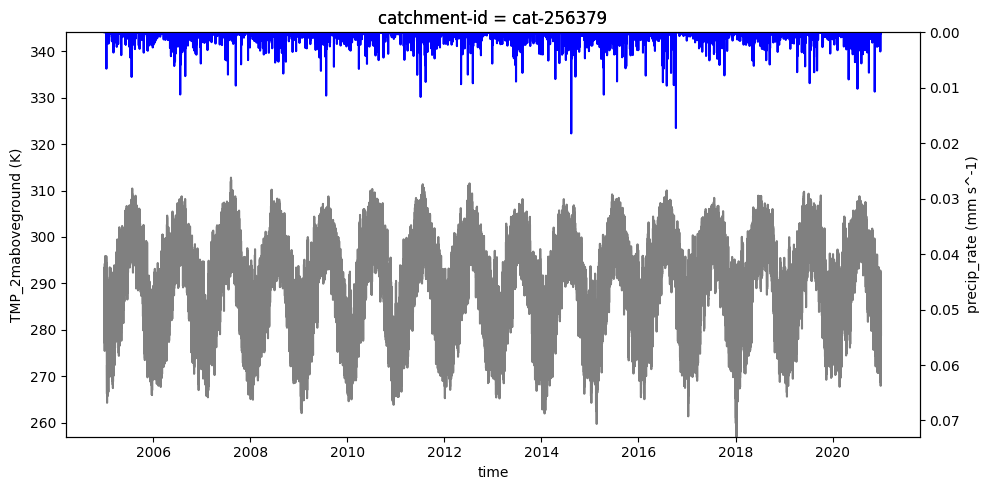

In [19]:
top_variable = 'precip_rate'
bottom_variable = 'TMP_2maboveground'

fig, ax1 = plt.subplots(figsize=(10, 5))

ds_cat[bottom_variable].plot(ax=ax1, label=bottom_variable, color='grey')
bottom_variable_units = ds_cat[bottom_variable].attrs['units']
ax1.set_ylabel(f'{bottom_variable} ({bottom_variable_units})')
ax1.tick_params(axis='y')
ax1.set_ylim((ds_cat[bottom_variable].min().item(),
              ds_cat[bottom_variable].max().item() * 1.1)) 

# Create a second y-axis
ax2 = ax1.twinx()

# Second series on right y-axis
ds_cat[top_variable].plot(ax=ax2, label=top_variable, color='blue')
top_variable_units = ds_cat[top_variable].attrs['units']
ax2.set_ylabel(f'{top_variable} ({top_variable_units})')
ax2.tick_params(axis='y')
ax2.set_ylim((ds_cat[top_variable].min(),
              ds_cat[top_variable].max().item() * 4)) 
ax2.invert_yaxis()

plt.tight_layout()
plt.show()

**Creating the realization and runt the CFE model

In [ ]:
#Generate the configuration files
# run_ngiab_realization(gage_id=gage_id, start=start_date, end=end_date)
# run_ngiab_realization(catchment_id = cat_ids[0], start=start_date, end=end_date)

#run in the loop
for id in cat_ids:
    run_ngiab_realization(catchment_id = id, start=start_date, end=end_date)

Running command: python -m ngiab_data_cli -i cat-100224 -r --start 2005-01-01 --end 2020-12-30
⠧ Initializing.....


2025-07-07 13:31:59,710 - INFO - Processing cat-100224 in /home/jovyan/ngiab_preprocess_output/cat-100224
2025-07-07 13:32:01,236 - INFO - Upstream catchments: 18
2025-07-07 13:32:01,237 - INFO - Creating realization from 2005-01-01 00:00:00 to 2020-12-30 00:00:00...
2025-07-07 13:32:07,946 - INFO - Realization creation complete.
2025-07-07 13:32:07,946 - INFO - All operations completed successfully.
2025-07-07 13:32:07,946 - INFO - Output folder: file:////home/jovyan/ngiab_preprocess_output/cat-100224


Running command: python -m ngiab_data_cli -i cat-1010263 -r --start 2005-01-01 --end 2020-12-30
⠧ Initializing.....


2025-07-07 13:32:12,706 - INFO - Processing cat-1010263 in /home/jovyan/ngiab_preprocess_output/cat-1010263
2025-07-07 13:32:14,155 - INFO - Upstream catchments: 6
2025-07-07 13:32:14,155 - INFO - Creating realization from 2005-01-01 00:00:00 to 2020-12-30 00:00:00...
2025-07-07 13:32:17,257 - INFO - Realization creation complete.
2025-07-07 13:32:17,257 - INFO - All operations completed successfully.
2025-07-07 13:32:17,258 - INFO - Output folder: file:////home/jovyan/ngiab_preprocess_output/cat-1010263


Running command: python -m ngiab_data_cli -i cat-1021677 -r --start 2005-01-01 --end 2020-12-30
⠙ Initializing.....


2025-07-07 13:32:21,538 - INFO - Processing cat-1021677 in /home/jovyan/ngiab_preprocess_output/cat-1021677
2025-07-07 13:32:22,970 - INFO - Upstream catchments: 33
2025-07-07 13:32:22,970 - INFO - Creating realization from 2005-01-01 00:00:00 to 2020-12-30 00:00:00...
2025-07-07 13:32:26,138 - INFO - Realization creation complete.
2025-07-07 13:32:26,138 - INFO - All operations completed successfully.
2025-07-07 13:32:26,138 - INFO - Output folder: file:////home/jovyan/ngiab_preprocess_output/cat-1021677


Running command: python -m ngiab_data_cli -i cat-1023764 -r --start 2005-01-01 --end 2020-12-30
⠙ Initializing.....


2025-07-07 13:32:30,367 - INFO - Processing cat-1023764 in /home/jovyan/ngiab_preprocess_output/cat-1023764
2025-07-07 13:32:31,796 - INFO - Upstream catchments: 1
2025-07-07 13:32:31,796 - INFO - Creating realization from 2005-01-01 00:00:00 to 2020-12-30 00:00:00...
2025-07-07 13:32:34,907 - INFO - Realization creation complete.
2025-07-07 13:32:34,907 - INFO - All operations completed successfully.
2025-07-07 13:32:34,907 - INFO - Output folder: file:////home/jovyan/ngiab_preprocess_output/cat-1023764


Running command: python -m ngiab_data_cli -i cat-102612 -r --start 2005-01-01 --end 2020-12-30
⠋ Initializing.....


2025-07-07 13:32:39,100 - INFO - Processing cat-102612 in /home/jovyan/ngiab_preprocess_output/cat-102612
2025-07-07 13:32:40,568 - INFO - Upstream catchments: 1
2025-07-07 13:32:40,568 - INFO - Creating realization from 2005-01-01 00:00:00 to 2020-12-30 00:00:00...
2025-07-07 13:32:43,688 - INFO - Realization creation complete.
2025-07-07 13:32:43,688 - INFO - All operations completed successfully.
2025-07-07 13:32:43,688 - INFO - Output folder: file:////home/jovyan/ngiab_preprocess_output/cat-102612


Running command: python -m ngiab_data_cli -i cat-103066 -r --start 2005-01-01 --end 2020-12-30
⠋ Initializing.....


2025-07-07 13:32:47,878 - INFO - Processing cat-103066 in /home/jovyan/ngiab_preprocess_output/cat-103066
2025-07-07 13:32:49,334 - INFO - Upstream catchments: 15
2025-07-07 13:32:49,334 - INFO - Creating realization from 2005-01-01 00:00:00 to 2020-12-30 00:00:00...
2025-07-07 13:32:52,477 - INFO - Realization creation complete.
2025-07-07 13:32:52,477 - INFO - All operations completed successfully.
2025-07-07 13:32:52,477 - INFO - Output folder: file:////home/jovyan/ngiab_preprocess_output/cat-103066


Running command: python -m ngiab_data_cli -i cat-105032 -r --start 2005-01-01 --end 2020-12-30
⠹ Initializing.....


2025-07-07 13:32:56,777 - INFO - Processing cat-105032 in /home/jovyan/ngiab_preprocess_output/cat-105032


In [18]:
#To shut down the client that is running which is not shut down properly.
from dask.distributed import Client
import logging

logger = logging.getLogger(__name__)
try:
    client = Client.current()
    client.shutdown()
except ValueError:
    logger.debug("No cluster found to shutdown")


In [25]:
#Print the folder structure
!tree ../ngiab_preprocess_output/{catchment_id}/config

../ngiab_preprocess_output/cat-1570551/config
├── cat-1570551_subset.gpkg
├── cat_config
│   ├── CFE
│   │   ├── cat-1570551.ini
│   │   ├── cat-1570553.ini
│   │   ├── cat-1570687.ini
│   │   └── cat-1570692.ini
│   └── NOAH-OWP-M
│       ├── cat-1570551.input
│       ├── cat-1570553.input
│       ├── cat-1570687.input
│       └── cat-1570692.input
├── realization.json
└── troute.yaml

3 directories, 11 files


**For the Final step, i.e Running the CFE and routing model**

In Terminal:

source /ngen/.venv/bin/activate

**go to that catchment or gage directory**
replace with your working cat or gage and iDs and run

and run this in terminal

ngen ./config/gage-02464000_subset.gpkg "" ./config/gage-02464000_subset.gpkg "" ./config/realization.json

**Merging the forcings data and the ngen-cfe outputs**

In [5]:
root_dir = Path("../ngiab_preprocess_output")
nc_files = sorted(root_dir.glob("cat-*/forcings/forcings.nc"))

In [6]:
#To merge a lot of forcings into one
import xarray as xr
import os
from pathlib import Path
from tqdm import tqdm

datasets = []
for nc_file in tqdm(nc_files, desc="Loading datasets"):
    try:
        ds = xr.open_dataset(nc_file)
        datasets.append(ds)
    except Exception as e:
        print(f"Failed to load {nc_file}: {e}")
merged_ds = xr.concat(datasets, dim='catchment-id')

output_path = "../data/FinalData/merged_forcings.nc"
merged_ds.to_netcdf(output_path)
print(f"Merged forcings saved to: {output_path}")


Loading datasets: 100%|██████████| 253/253 [00:15<00:00, 16.56it/s]


Merged forcings saved to: ../data/FinalData/merged_forcings.nc


In [10]:
def collect_csvs(root_dir, output_dir):
    """
    Go through each folder in root_dir, collect 'outputs/ngen/{cat-id}.csv' files,
    and copy them into output_dir.
    
    Parameters:
    -----------
    root_dir : str
        Path to the parent directory (e.g., 'ngiab_preprocess_output')
    output_dir : str
        Destination path where collected CSVs will be stored
    """
    os.makedirs(output_dir, exist_ok=True)
    collected = 0

    for cat_id in os.listdir(root_dir):
        subdir = os.path.join(root_dir, cat_id)
        if os.path.isdir(subdir):
            csv_path = os.path.join(subdir, "outputs", "ngen", f"{cat_id}.csv")
            if os.path.isfile(csv_path):
                shutil.copy(csv_path, os.path.join(output_dir, f"{cat_id}.csv"))
                collected += 1

    print(f"Collected {collected} CSVs from '{root_dir}' into '{output_dir}'")


In [12]:
output_dir = Path("../data/FinalData/cfe_results")
collect_csvs(root_dir, output_dir)

Collected 251 CSVs from '../ngiab_preprocess_output' into '../data/FinalData/cfe_results'
